In [1]:
#importing basic packages for data understanding and numerical package for math operations
import pandas as pd
import numpy as np

                                    
import matplotlib.pyplot as plt     ##importing required packages for visulization and plotting 
%matplotlib inline 
                
import datetime as dt              #package required for DATE/TIME

import seaborn as sns            #set seabor graphs to a better style
sns.set(style="ticks")
sns.set_style("darkgrid")

import pandas_profiling as pf            #importing package for data auditing

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

import scipy.stats as stats  #scientific python

from sklearn import datasets  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

pd.pandas.set_option('display.max_columns',None)             #it will show all the columns
#pd.pandas.set_option('display.max_rows',None)               #it will show all the rows
import os # os.chdir(path link)                              #importing package to execute operating system functions
import re

import math

# BUSINESS PROBLEM-1

#### BACKGROUND: 
              -The Lending Club is a peer-to-peer lending site where members make loans to each other. The site makes 
               anonymized data on loans and borrowers publicly available.
            
#### BUSINESS PROBLEM:
            -Using lending club loans data, the team would like to test below hypothesis on how different
             factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)
               - a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)
                -b. Loan length is directly effecting intrest rate.
                -c. Inrest rate varies for different purpose of loans
                -d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home
                 will have high FICO scores.
#### DATA AVAILABLE:
           -LoansData.csv

#### The data have the following variables (with data type and explanation of meaning)
- Amount.Requested - numeric. The amount (in dollars) requested in the loan application.
- Amount.Funded.By.Investors - numeric. The amount (in dollars) loaned to the individual.
- Interest.rate – character. The lending interest rate charged to the borrower.
- Loan.length - character. The length of time (in months) of the loan.
- Loan.Purpose – categorical variable. The purpose of the loan as stated by the applicant.
- Debt.to.Income.Ratio – character. The % of consumer’s gross income going toward paying debts.
- State - character. The abbreviation for the U.S. state of residence of the loan applicant.
- Home.ownership - character. Indicates whether the applicant owns, rents, or has a mortgage.
- Monthly.income - categorical. The monthly income of the applicant (in dollars).
- FICO.range – categorical (expressed as a string label e.g. “650-655”). A range indicating the applicants FICO score.
- Open.CREDIT.Lines - numeric. The number of open lines of credit at the time of application.
- Revolving.CREDIT.Balance - numeric. The total amount outstanding all lines of credit.
- Inquiries.in.the.Last.6.Months - numeric. Number of credit inquiries in the previous 6 months.
- Employment.Length - character. Length of time employed at current job.

In [2]:
LoansData=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\Case Study 5-Basic Statistics - Hypothesis Testing\LoansData.csv")

In [3]:
LoansData.columns=[i.replace('.','_') for i in LoansData.columns]

In [4]:
LoansData.dtypes

Amount_Requested                  float64
Amount_Funded_By_Investors        float64
Interest_Rate                      object
Loan_Length                        object
Loan_Purpose                       object
Debt_To_Income_Ratio               object
State                              object
Home_Ownership                     object
Monthly_Income                    float64
FICO_Range                         object
Open_CREDIT_Lines                 float64
Revolving_CREDIT_Balance          float64
Inquiries_in_the_Last_6_Months    float64
Employment_Length                  object
dtype: object

## Missing Values

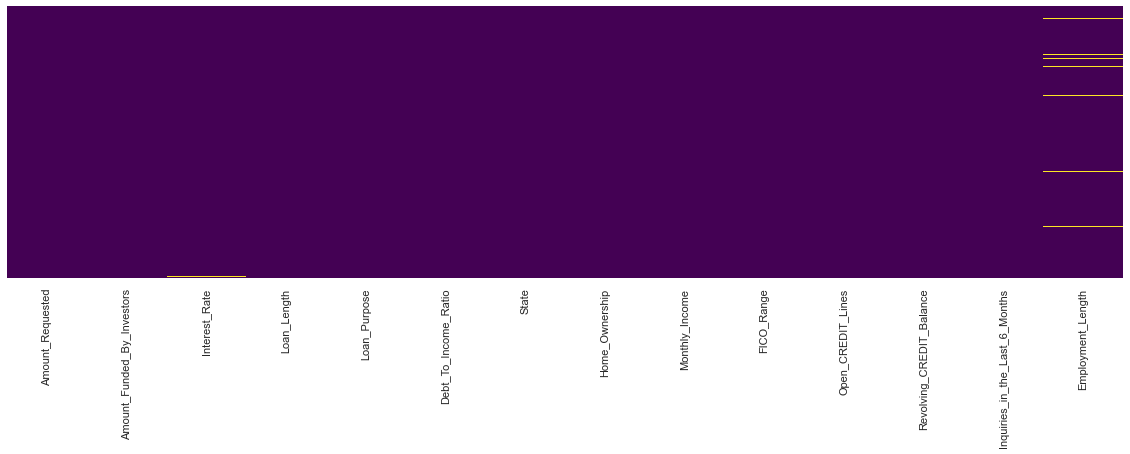

In [5]:
plt.figure(figsize=(20,5))
sns.heatmap(LoansData.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [6]:
def miss_treat(x):
    if x.dtype =='O':
        x = x.fillna(x.mode()[0])
    elif ((x.dtype == 'float') | (x.dtype == 'int')):
        x = x.fillna(x.median())
    return x

LoansData=LoansData.apply(miss_treat)

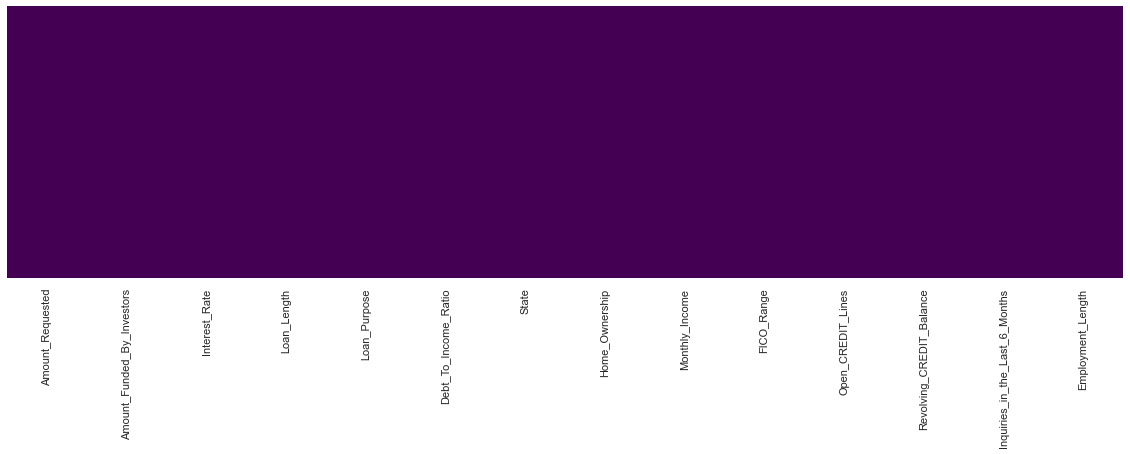

In [7]:
plt.figure(figsize=(20,5))
sns.heatmap(LoansData.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [8]:
LoansData['Interest_Rate']=LoansData.Interest_Rate.apply(lambda x:str(x).replace('%','')).astype('f')
LoansData['Debt_To_Income_Ratio']=LoansData.Debt_To_Income_Ratio.apply(lambda x:str(x).replace('%','')).astype('f')
LoansData['Loan_Length']=LoansData.Loan_Length.apply(lambda x:str(x).replace(' ',''))
LoansData['FICO_Score']= LoansData.FICO_Range.apply(lambda i:str(i)[0:3]).astype('f')
LoansData['Employment_Length']= LoansData.Employment_Length.apply(lambda i:str(i).replace('years','').replace('year','').replace('<','').replace('+','')).astype('f')

In [9]:
LoansData=LoansData.drop(['FICO_Range'],axis=1)

In [10]:
def outliers(x):
    if ((x.dtype=='int')| (x.dtype=='float')):
        x=x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99))
    else :
        x
    return x

LoansData=LoansData.apply(outliers)

**a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan
amounts)**

**H0: S_corr = 0**
    <br>
**Ha: S_corr<>0**

In [11]:
stats.pearsonr(LoansData.Amount_Funded_By_Investors,LoansData.Interest_Rate)

(0.33744350610145957, 1.2560621082680584e-67)

**conclusion: p-value<0.01, we can reject null with 99% Cl and accept alternative**
    <br>
**buisness conclusion: Intrest rate is varied for different loan amounts**
    <br>
**Relationship : positive**


**b. Loan length is directly effecting intrest rate.**

In [12]:
IR_36= LoansData.Interest_Rate[LoansData.Loan_Length=='36months']
IR_60= LoansData.Interest_Rate[LoansData.Loan_Length=='60months']

In [13]:
print('IR_36_avg: ', IR_36.mean())
print('IR_36_std: ', IR_36.std())
print('IR_60_avg: ', IR_60.mean())
print('IR_60_std: ', IR_60.std())

IR_36_avg:  12.12618637084961
IR_36_std:  3.6793391704559326
IR_60_avg:  16.407482147216797
IR_60_std:  4.127213001251221


**H0: Avg_IR_36 = Avg_IR_60**
<br>
**Ha: Avg_IR_36 <> Avg_IR_60**

In [14]:
stats.ttest_ind(IR_36,IR_60)

Ttest_indResult(statistic=-23.416353629221486, pvalue=8.531092423128078e-110)

**conclusion: p-value<0.01, we can reject null with 99% Cl and accept alternative**
    <br>
**buisness conclusion: Loan length is directly effecting intrest rate.**

**c. Inrest rate varies for different purpose of loans**

In [15]:
s1=LoansData.Interest_Rate[LoansData.Loan_Purpose=='debt_consolidation']
s2=LoansData.Interest_Rate[LoansData.Loan_Purpose=='credit_card']
s3=LoansData.Interest_Rate[LoansData.Loan_Purpose=='other']
s4=LoansData.Interest_Rate[LoansData.Loan_Purpose=='home_improvement']
s5=LoansData.Interest_Rate[LoansData.Loan_Purpose=='major_purchase']
s6=LoansData.Interest_Rate[LoansData.Loan_Purpose=='small_business']
s7=LoansData.Interest_Rate[LoansData.Loan_Purpose=='car']
s8=LoansData.Interest_Rate[LoansData.Loan_Purpose=='wedding']
s9=LoansData.Interest_Rate[LoansData.Loan_Purpose=='medical']
s10=LoansData.Interest_Rate[LoansData.Loan_Purpose=='moving']
s11=LoansData.Interest_Rate[LoansData.Loan_Purpose=='vacation']
s12=LoansData.Interest_Rate[LoansData.Loan_Purpose=='house']
s13=LoansData.Interest_Rate[LoansData.Loan_Purpose=='educational']
s14=LoansData.Interest_Rate[LoansData.Loan_Purpose=='renewable_energy']

In [16]:
a=s1.mean()
b=s2.mean()
c=s3.mean()
d=s4.mean()
e=s5.mean()
f=s6.mean()
g=s7.mean()
h=s8.mean()
i=s9.mean()
j=s10.mean()
k=s11.mean()
l=s12.mean()
m=s13.mean()
n=s14.mean()

In [17]:
pd.DataFrame({'Mean':['S1_mean','S2_mean','S3_mean','S4_mean','S5_mean','S6_mean','S7_mean','S8_mean','S9_mean','S10_mean','S11_mean','S12_mean','S13_mean','S14_mean'],
             'val':[a,b,c,d,e,f,g,h,i,j,k,l,m,n]}).sort_values('val',ascending=False)

,Mean,val
9,S10_mean,13.621034
0,S1_mean,13.586946
11,S12_mean,13.448000
2,S3_mean,13.159554
1,S2_mean,13.048570
5,S6_mean,12.839197
7,S8_mean,12.048975
10,S11_mean,11.966191
8,S9_mean,11.649667
3,S4_mean,11.594280



***H0: Avg_s1= Avg_s2 =Avg_s3=Avg_s4= Avg_s5 =Avg_s6=Avg_s7= Avg_s8=Avg_s9= Avg_s10 =Avg_s11=Avg_s12= Avg_s13 =Avg_s14***
    <br>
***Ha: one of segment average is different from others***

In [18]:
stats.f_oneway(s1, s2, s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14)

F_onewayResult(statistic=7.4914538073815535, pvalue=1.1044431180704092e-14)

**Conclusion: we can reject null  with 99% CL, given the confidnece level accepting Alternative HYP**
<br>
**Business Conclusion:  we can conclude they are different from each other**

**d. There is relationship between FICO scores and Home Ownership. It means that, People
with owning home will have high FICO scores.**

In [19]:
s1=LoansData.FICO_Score[LoansData.Home_Ownership=='MORTGAGE']
s2=LoansData.FICO_Score[LoansData.Home_Ownership=='RENT']
s3=LoansData.FICO_Score[LoansData.Home_Ownership=='OWN']
s4=LoansData.FICO_Score[LoansData.Home_Ownership=='OTHER']
s5=LoansData.FICO_Score[LoansData.Home_Ownership=='NONE']

In [20]:
a=s1.mean()
b=s2.mean()
c=s3.mean()
d=s4.mean()
e=s5.mean()

In [21]:
pd.DataFrame({'Home_Ownership':['MORTGAGE_mean','RENT_mean','OWN_mean','OTHER_mean','NONE_mean'],
             'val':[a,b,c,d,e]}).sort_values('val',ascending=False)

,Home_Ownership,val
4,NONE_mean,800.000000
0,MORTGAGE_mean,711.659424
2,OWN_mean,706.549988
1,RENT_mean,700.030518
3,OTHER_mean,672.000000



***H0: Avg_s1= Avg_s2 =Avg_s3=Avg_s4= Avg_s5***
    <br>
***Ha: one of Home_Ownership average is different from others***

In [22]:
stats.f_oneway(s1,s2,s3,s4,s5)

F_onewayResult(statistic=19.330308155159962, pvalue=1.1227031714003807e-15)

**Conclusion: we can reject null  with 99% CL, given the confidnece level accepting Alternative HYP**
<br>
**Business Conclusion:  There is relationship between FICO scores and Home Ownership**

# BUSINESS PROBLEM - 2

#### BACKGROUND: 
                -When an order is placed by a customer of a small manufacturing company, a price quote must be 
     developed for that order. Because each order is unique, quotes must be established on an order-by-order basis by 
     a pricing expert. The price quote process is laborintensive, as prices depend on many factors such as the part number,
     customer, geographic location, market, and order volume. The sales department manager is concerned that the pricing
     process is too complex, and that there might be too much variability in the quoted prices. An improvement team 
     is tasked with studying and improving the pricing process. After interviewing experts to develop a better understanding
     of the current process, the team designed a study to determine if there is variability between pricing experts. 
     That is, do different pricing experts provide different price quotes? Two randomly selected pricing experts, Mary and
     Barry, were asked to independently provide prices for twelve randomly selected orders. Each expert provided one price
     for each of the twelve orders.

#### BUSINESS PROBLEM: 
                   -We would like to assess if there is any difference in the average price quotes provided by 
                    Mary and Barry.
#### DATA AVAILABLE:
                 - Price_Quotes.csv
                 
                 
                 The data set contains the order number, 1 through 12, and the price quotes by Mary
                  and Barry for each order. Each row in the data set is the same order. Thus, Mary and
                  Barry produced quotes for the same orders.

In [23]:
Price_Quotes=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\Case Study 5-Basic Statistics - Hypothesis Testing\Price_Quotes.csv")

**We would like to assess if there is any difference in the average
price quotes provided by Mary and Barry.**

In [24]:
Barry=Price_Quotes.Barry_Price
Mary=Price_Quotes.Mary_Price

In [25]:
print('Barry_avg: ', Barry.mean())
print('Barry_std: ', Barry.std())
print('Mary_avg: ', Mary.mean())
print('Mary_std: ', Mary.std())

Barry_avg:  124.33333333333333
Barry_std:  20.698411591816473
Mary_avg:  114.75
Mary_std:  11.054616477044577


**H0: Barry_Q= Mary_Q**
<br>
**Ha: Barry_Q<> Mary_Q**

In [26]:
stats.ttest_ind(Barry,Mary)

Ttest_indResult(statistic=1.4147436739281787, pvalue=0.17114226132118285)

**conclusion: p-value>0.05, we can't reject null with 95% Cl**
    <br>
**Buisness conclusion:No difference in the average
price quotes provided by Mary and Barry**

# BUSINESS PROBLEM-3

#### BACKGROUND: 
            The New Life Residential Treatment Facility is a NGO that treatsteenagers who have shown signs of mental 
            illness.It provides housing and supervision of teenagers who are making the transition from psychiatric
            hospitals back into the community. Because many of the teenagers were severely abused as children and have 
            been  involved with the juvenile justice system, behavioral problems are common at New Life. Employee pay 
            is low and  staff turnover (attrition) is high.A reengineering program wasinstituted at New Life with the 
            goals of lowering behavioral problems of the kids and decreasing employee turnover rates. As a part of this
            effort, the following  changes were made:
            
                *Employee shifts were shortened from 10 hours to 8 hours each day.
                *Employees were motivated to become more involved in patient treatments. This included encouraging staff
                  to run varioustherapeutic treatment sessions and allowing staff to have more say in program changes.
                *The activities budget wasincreased.
                *A facility-wide performance evaluation system was putinto place that rewarded staff 
                   participation and innovation.
                *Management and staff instituted a program designed to raise expectations about appropriate behavior from 
                 the kids. This included strict compliance with reporting of behavioral violations, insistence on
                 participation in therapeutic sessions,and a lowered tolerance for even moderate behavioralinfractions.
                 
                 
            To determine the effectiveness of the reengineering effort, a data set comprised of pre- and
            post-reengineering periods was compiled. The information contains two measures of
            behavioral problems. A critical incident occurs when a resident goes AWOL (leavesthe
            premises without permission), destroys property (e.g., punching a hole in a wall or throwing
            furniture through windows), is caught in possession of street drugs, or engages in assault
            against other residents or staff members. A teenager istemporarily removed from the facility
            when s/he is sent to jail or back to a psychiatric hospital.
            

#### BUSINESS PROBLEM: 
            Determine what effect, if any, the reengineering effort had on the incidence behavioral problems and staff
            turnover. i.e To determine if the reengineering effort changed the critical incidence rate. Is there evidence
            that the critical incidence rate improved?
            

#### DATA AVAILABLE: 
        Treatment_Facility.csv
    
    The data set contains 20 months of data; the first 13 months were prior to reengineering. The
    variables in the data include:
        - Reengineer: Whether the month was before (Prior) or after (Post) reengineering
        - EmployeeTurnover: The percentage of employees who quit in a given month, out of the total number of employees
        - TRFF(%): The percentage of residents who were temporarily removed from the facility, out of the 
          total number of residents
        - CI (%): The percentage of critical incident reports written that month, out of the total number of residents



**Determine what effect, if any, the reengineering effort had on the
incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort
changed the critical incidence rate. Isthere evidence that the critical incidence rate
improved?**

**a.**

In [27]:
Treatment_Facility=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\Case Study 5-Basic Statistics - Hypothesis Testing\Treatment_Facility.csv")

In [28]:
Treatment_Facility=Treatment_Facility.rename({'VAR4':'Temporarily_emoved_from_facility','VAR5':'Critical_incident_reports'},axis=1)

In [29]:
Prior_Turn=Treatment_Facility.Employee_Turnover[Treatment_Facility.Reengineer=='Prior']
Post_Turn=Treatment_Facility.Employee_Turnover[Treatment_Facility.Reengineer=='Post']

In [30]:
print('Prior_Turnavg: ', Prior_Turn.mean())
print('Prior_Turn_std: ', Prior_Turn.std())
print('Post_Turn_avg: ', Post_Turn.mean())
print('Post_Turn_std: ', Post_Turn.std())

Prior_Turnavg:  11.735692307692307
Prior_Turn_std:  7.041651205086954
Post_Turn_avg:  18.68912857142857
Post_Turn_std:  10.555508600522964


**H0: Prior_Turn= Post_Turn**
<br>
**Ha: Prior_Turn<> Post_Turn**

In [31]:
stats.ttest_ind(Prior_Turn,Post_Turn)

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

**conclusion: p-value>0.05, We can't reject null with 95% Cl**
<br>
**conclusion: p-value<.10 We can reject null with 90% CI**
    <br>
**Buisness conclusion:No difference in the average
Turnover between Prior and Post**

**b.**

In [32]:
Prior_CI=Treatment_Facility.Critical_incident_reports[Treatment_Facility.Reengineer=='Prior']
Post_CI=Treatment_Facility.Critical_incident_reports[Treatment_Facility.Reengineer=='Post']

In [33]:
print('Prior_CI_avg: ', Prior_CI.mean())
print('Prior_CI_std: ', Prior_CI.std())
print('Post_CI_avg: ', Post_CI.mean())
print('Post_CI_std: ', Post_CI.std())

Prior_CI_avg:  53.887906321846145
Prior_CI_std:  48.69554682439691
Post_CI_avg:  23.34971927988571
Post_CI_std:  7.808181146610079


**H0: Prior_CI= Post_CI**
<br>
**Ha: Prior_CI<> Post_CI**

In [34]:
stats.ttest_ind(Prior_CI,Post_CI)

Ttest_indResult(statistic=1.6279144253528646, pvalue=0.12091989189884149)

**conclusion: p-value>0.05, We can't reject null with 95% Cl**
<br>
**conclusion: p-value<.13 We can reject null with 87% CI**
    <br>
**Buisness conclusion:No difference between Them**

**There is No Reengineering effort had on the
incidence behavioral problems and staff turnover**

# BUSINESS PROBLEM-4

#### BACKGROUND: 

    Software development projectstypically follow six basic phases: Requirements,
    design, implementation (and integration), testing (validation), deployment (installation) and
    maintenance. First, general requirements are gathered, and the scope of the functionality is
    defined. Then, alternative scenarios for the required functionality are developed and
    evaluated. Implementation, usually 50% or more of the development time, is the phase in
    which the design istranslated into programs and integrated with other parts of the software –
    this is when software engineers actually develop the code. During the final phases, programs
    are tested, software is put into use, and faults or performance issues are addressed.
    ApDudes, a developer of applicationsfor tablet computers, was having difficulty meeting
    project deadlines; only 10% of their projects had been completed within budget and on time
    last year and that wasstarting to hurt business. The group’s project manager wastasked with
    studying problems within the implementation phase. He found thatsoftware engineers were
    having difficulty prioritizing their work, and that they often became overwhelmed by the
    magnitude of the projects.
    
    As a result, two changes were made. Each project was broken down into smaller, distinct
    tasks, or jobs, and each job was assigned a priority. The project manager believes that this
    classification and prioritization system would speed the completion of high priority jobs, and
    thuslower overall project completion time
    
    
#### BUSINESS PROBLEM: 

    We will focus on the prioritization system. If the system is working, then
    high priority jobs, on average, should be completed more quickly than medium priority jobs,
    and medium priority jobs should be completed more quickly than low priority jobs. Use the
    data provided to determine whether thisis, in fact, occurring.
    
#### DATA AVAILABLE:
    - Priority_Assessment.csv
    
    The data set contains a random sample of 642 jobs completed over the lastsix months. The
    variables in the data set are:
        Days:  The number of days it took to complete the job
        Priority: The priority level assigned to that job

In [35]:
Priority_Assessment=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\Case Study 5-Basic Statistics - Hypothesis Testing\Priority_Assessment.csv")


In [36]:
Priority_Assessment.head(1)

,Days,Priority
0,3.3,High


In [37]:
High_days=Priority_Assessment.Days[Priority_Assessment.Priority=='High']
Medium_days=Priority_Assessment.Days[Priority_Assessment.Priority=='Medium']
Low_days=Priority_Assessment.Days[Priority_Assessment.Priority=='Low']

**We will focus on the prioritization system. If the system is working, then
high priority jobs, on average, should be completed more quickly than medium priority jobs,
and medium priority jobs should be completed more quickly than low priority jobs. Use the
data provided to determine whether thisis, in fact, occurring.**

In [38]:
a=High_days.mean()
b=Medium_days.mean()
c=Low_days.mean()

In [39]:
pd.DataFrame({'Priority':['High_days.mean','Medium_days','Low_days'],
             'val':[a,b,c]}).sort_values('val',ascending=True)

,Priority,val
1,Medium_days,2.500000
0,High_days.mean,3.023620
2,Low_days,4.228358


***H0: Avg_High_days= Avg_Medium_days =Avg_Low_days***
    <br>
***Ha: one of Home_Ownership average is different from others***

In [40]:
stats.f_oneway(High_days,Medium_days,Low_days)

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

**Conclusion: we can't reject null  with 95% CL, given the confidnece level**
<br>
**Business Conclusion:  There is No relationship between them**

# BUSINESS PROBLEM-5

#### BackGround: 

    Film on the Rocksis a summer movie series held at the world-renowned Red
    Rocks Amphitheatre, which is situated on a hillside of the Rocky Mountains in Morrison,
    Colorado fifteen miles west of Denver. The film seriesfeatures classic films, and pre-show
    entertainment including bands and comedians. Among the features that have made Red Rocks
    an internationally-famous concertstage are sweeping views of Denver, outstanding acoustics,
    and cool, dry Colorado summers.
    
    The seriesis jointly promoted by the Denver Film Society (DFS) and the City and County of
    Denver’s Division of Theatres and Arenas(DT&A). It is marketed through various outlets
    including newspaper, radio, and the Red Rocks and Denver Film Society websites. Film on the
    Rocks patrons also benefit from corporate sponsorship. In return for on-site posters and
    banners at Red Rocks, and recognition in pre- show marketing materials, corporations donate
    fundsthat keep ticket priceslow.
    
    Although the Red Rocks Amphitheatre provides a cinematic experience unlike any other venue,
    there are tradeoffs. Red Rocks is a farther commute for most people than the local movie
    theater or movie rental store. Given the uphill walk to the amphitheatre from the parking lot,
    getting there can be challenging. And, as an outdoor venue, the viewing experience is
    dependent on the weather.
    
    Patron satisfaction with Red Rocks as the venue for the film series is critical to its success. But,
    the series promoters would also like to increase attendance at the film series, and are unsure
    how to do this. Promotersrecognize that they need a better understanding of the customer
    base, and of the current level of satisfaction. Knowing the demographics of those who attend
    the film series will help attract and expand corporate sponsorship. In addition, knowing which
    media outlets are most effective will provideinformation about how best to target future
    marketing campaigns.
    
    To this end, the promoters conducted surveys during a recent Film on the Rocks season.
    Questionnaires were handed out at the entrance. Volunteers walked through the crowd to
    remind people about the free soft drink given to those who returned the survey.

#### BUSINESS PROBLEM: 
     Use the survey results to address the following questions
     .What isthe overall level of customer satisfaction?
     .What factors are linked to satisfaction?
     .What is the demographic profile of Film on the Rocks patrons?
     .In what media outlet(s) should the film series be advertised?
     
     
#### DATA AVAILABLE: 
    Data provided by the Denver Film Society
        -Films.csv
        
    The data set contains 330 surveys collected during three Film on the Rocks movies:
    Ferris Bueller’s Day Off, Old School, and Willy Wonka and the Chocolate Factory.
    
    The variables are:
        *Gender The patron’s gender:  1 = male; 2 = female
        
        *Marital Status The patron’s marital status:  1 = married; 2 = single
        
        *Age The patron’s age in years: 1= 1-12; 2 = 13-30; 3 = 31-60; 4 = 60+
        
        *Income The patron’s annual household income: 1 = Less than $50,000; 2 = $50-$100,000; 3 = $100,000+
        
        * Hear About The patron’s response to this question: “How did you hear about Film
        on the Rocks?” Respondents could check any of the following that applied: 1 = television;
        2 =newspaper; 3 = radio; 4 = website; 5 = word of mouth
        
        *The survey also contained four Likert-scaled questions aboutsatisfaction; each of the following
        questions is coded: 1 = Excellent; 2 = Good; 3 = Average/Fair; 4 = Poor; 5 = Very Poor.
        
        Signage  “How wasthe signage directing you to Red Rocks?”
        Parking  “How wasthe venue’s parking?”
        Clean    “How was the cleanliness of the venue?”
        Overall  “How was your overall customer service experience?”

In [41]:
films=pd.read_csv(r"C:\Users\putta\Desktop\PYTHON\Case Study 5-Basic Statistics - Hypothesis Testing\Films.csv")

In [42]:
films=films.drop('_rowstate_',axis=1)

# Missing Value

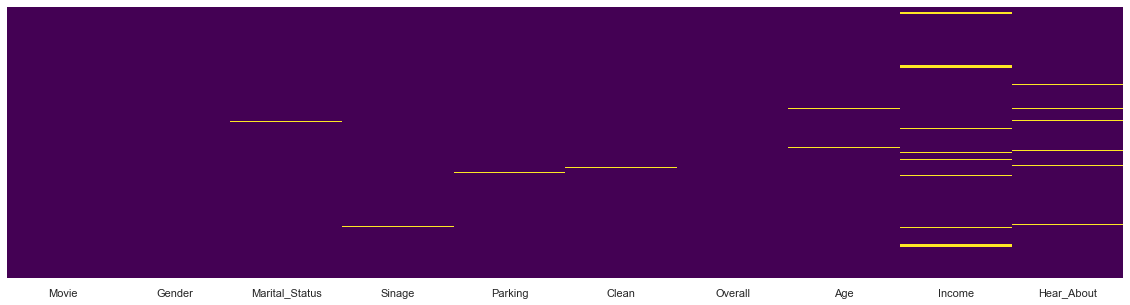

In [43]:
plt.figure(figsize=(20,5))
sns.heatmap(films.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [44]:
def miss_treat(x):
    if x.dtype =='O':
        x = x.fillna(x.mode()[0])
    elif ((x.dtype == 'float') | (x.dtype == 'int')):
        x = x.fillna(x.median())
    return x

films=films.apply(miss_treat)

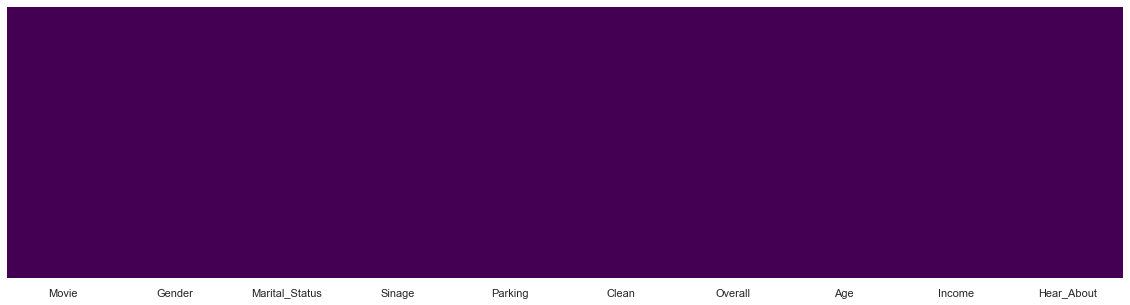

In [45]:
plt.figure(figsize=(20,5))
sns.heatmap(films.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [46]:
films.dtypes

Movie              object
Gender             object
Marital_Status     object
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

In [47]:
films['Gender']=np.where((films.Gender=='1'),'Male',np.where((films.Gender=='2'),'Female',films.Gender))
films['Marital_Status']=np.where((films.Marital_Status=='1'),'Married',np.where((films.Marital_Status=='2'),'Single',films.Marital_Status))
films['Income']=np.where((films.Income==1),'<50k',np.where((films.Income==2),'50k_100k','100k+'))

**a. What is the overall level of customer satisfaction?**


In [48]:
# confidence levels = 95% confidence levels
m = films.Overall.mean()
s = films.Overall.std()
se = films.Overall.std()/np.sqrt(330)
CL = (m-1.96*se, m+1.96*se)
CL

(1.5469994901816928, 1.6954247522425494)

**Level of Customer Satisfaction between 1.54 and 1.69**

**b. What factors are linked to Overall satisfaction?**

**Between Overall and Sinage**

In [49]:
Sinage=pd.crosstab(films.Sinage,films.Overall)

In [50]:
stats.chi2_contingency(Sinage)

(125.61859671027881,
 4.53298970003405e-19,
 16,
 array([[5.17060606e+01, 5.54727273e+01, 4.10909091e+00, 3.42424242e-01,
         1.36969697e+00],
        [7.22969697e+01, 7.75636364e+01, 5.74545455e+00, 4.78787879e-01,
         1.91515152e+00],
        [2.19636364e+01, 2.35636364e+01, 1.74545455e+00, 1.45454545e-01,
         5.81818182e-01],
        [2.74545455e+00, 2.94545455e+00, 2.18181818e-01, 1.81818182e-02,
         7.27272727e-02],
        [2.28787879e+00, 2.45454545e+00, 1.81818182e-01, 1.51515152e-02,
         6.06060606e-02]]))

**Between Overall and Parking**

In [51]:
Parking=pd.crosstab(films.Parking,films.Overall)

In [52]:
stats.chi2_contingency(Parking)

(230.61691663391676,
 4.783162283608494e-40,
 16,
 array([[6.17727273e+01, 6.62727273e+01, 4.90909091e+00, 4.09090909e-01,
         1.63636364e+00],
        [7.09242424e+01, 7.60909091e+01, 5.63636364e+00, 4.69696970e-01,
         1.87878788e+00],
        [1.32696970e+01, 1.42363636e+01, 1.05454545e+00, 8.78787879e-02,
         3.51515152e-01],
        [3.20303030e+00, 3.43636364e+00, 2.54545455e-01, 2.12121212e-02,
         8.48484848e-02],
        [1.83030303e+00, 1.96363636e+00, 1.45454545e-01, 1.21212121e-02,
         4.84848485e-02]]))

**Between Overall and Clean**

In [53]:
Clean=pd.crosstab(films.Clean,films.Overall)

In [54]:
stats.chi2_contingency(Clean)

(127.71945555999517,
 1.7772535915434025e-19,
 16,
 array([[6.58909091e+01, 7.06909091e+01, 5.23636364e+00, 4.36363636e-01,
         1.74545455e+00],
        [7.09242424e+01, 7.60909091e+01, 5.63636364e+00, 4.69696970e-01,
         1.87878788e+00],
        [1.09818182e+01, 1.17818182e+01, 8.72727273e-01, 7.27272727e-02,
         2.90909091e-01],
        [2.28787879e+00, 2.45454545e+00, 1.81818182e-01, 1.51515152e-02,
         6.06060606e-02],
        [9.15151515e-01, 9.81818182e-01, 7.27272727e-02, 6.06060606e-03,
         2.42424242e-02]]))

**Sinage,Parking,Clean are the factors effecting the Overall Satisfaction**

**C. What is the demographic profile of Film on the Rocks patrons?**

In [55]:
Gender=round(pd.crosstab(films.Movie,films.Gender)*100/films.Gender.count(),2)
Gender

Gender,Female,Male
Movie,,
Ferris Buellers Day Off,26.06,15.45
Old School,5.76,3.94
Willy Wonka,32.73,16.06


In [56]:
Marital_Status=round(pd.crosstab(films.Movie,films.Marital_Status)*100/films.Marital_Status.count(),2)
Marital_Status

Marital_Status,Married,Single,Slngle
Movie,,,
Ferris Buellers Day Off,12.42,28.48,0.61
Old School,3.33,6.36,0.00
Willy Wonka,14.55,34.24,0.00


In [57]:
Sinage=round(pd.crosstab(films.Movie,films.Sinage)*100/films.Sinage.count(),2)
Sinage

Sinage,1.0,2.0,3.0,4.0,5.0
Movie,,,,,
Ferris Buellers Day Off,16.06,19.39,5.76,0.00,0.30
Old School,3.64,3.94,1.21,0.61,0.30
Willy Wonka,14.55,24.55,7.58,1.21,0.91


In [58]:
Sinage=round(pd.crosstab(films.Movie,films.Sinage)*100/films.Sinage.count(),2)
Sinage

Sinage,1.0,2.0,3.0,4.0,5.0
Movie,,,,,
Ferris Buellers Day Off,16.06,19.39,5.76,0.00,0.30
Old School,3.64,3.94,1.21,0.61,0.30
Willy Wonka,14.55,24.55,7.58,1.21,0.91


In [59]:
Parking=round(pd.crosstab(films.Movie,films.Parking)*100/films.Parking.count(),2)
Parking

Parking,1.0,2.0,3.0,4.0,5.0
Movie,,,,,
Ferris Buellers Day Off,16.36,20.00,3.33,1.52,0.30
Old School,5.15,3.33,0.91,0.00,0.30
Willy Wonka,19.39,23.64,4.55,0.61,0.61


In [60]:
Clean=round(pd.crosstab(films.Movie,films.Clean)*100/films.Clean.count(),2)
Clean

Clean,1.0,2.0,3.0,4.0,5.0
Movie,,,,,
Ferris Buellers Day Off,18.48,18.79,3.64,0.61,0.0
Old School,3.64,4.85,0.91,0.00,0.3
Willy Wonka,21.52,23.33,2.73,0.91,0.3


In [61]:
Overall=round(pd.crosstab(films.Movie,films.Overall)*100/films.Overall.count(),2)
Overall

Overall,1.0,2.0,3.0,4.0,5.0
Movie,,,,,
Ferris Buellers Day Off,17.88,21.52,1.21,0.3,0.61
Old School,6.36,3.03,0.00,0.0,0.30
Willy Wonka,21.52,24.55,2.42,0.0,0.30


In [62]:
Age=round(pd.crosstab(films.Movie,films.Age)*100/films.Age.count(),2)
Age

Age,1.0,2.0,3.0,4.0
Movie,,,,
Ferris Buellers Day Off,3.64,21.21,14.55,2.12
Old School,0.61,6.06,3.03,0.00
Willy Wonka,3.64,26.36,17.88,0.91


In [63]:
Income=round(pd.crosstab(films.Movie,films.Income)*100/films.Income.count(),2)
Income

Income,100k+,50k_100k,<50k
Movie,,,
Ferris Buellers Day Off,11.21,13.94,16.36
Old School,3.33,2.12,4.24
Willy Wonka,12.73,13.64,22.42


**D.In what media outlet(s) should the film series be advertised?**

In [64]:
Hear_About=round(pd.crosstab(films.Movie,films.Hear_About)*100/films.Hear_About.count(),2)
Hear_About

Hear_About,1,"1,5",2,"2,5",3,"3,4","3,5",4,"4,5",5,"5,4"
Movie,,,,,,,,,,,
Ferris Buellers Day Off,3.94,0.3,1.21,0.3,1.21,0.0,0.0,5.15,0.3,29.09,0.0
Old School,0.30,0.0,1.21,0.0,0.30,0.3,0.0,0.30,0.0,7.27,0.0
Willy Wonka,2.42,0.0,1.21,0.3,2.73,0.3,0.3,6.97,0.0,34.24,0.3


**Films were advertised more though the  Word of mouth**